[![image](https://www.gdi-de.org/download/logo_gdi_1_0.png)](https://www.gdi-de.org/)

# Übung: Radverkehrsinfrastruktur

<div style="width: 100%; border-bottom: 2px solid red;"></div>

## Aufgabenstellung

**1. Datenbeschaffung:** 
Lade das Shapefile "Radnetz Deutschland" von der folgenden URL herunter: https://www.radroutenplaner-deutschland.de/downloads/Shape/Radnetz_Deutschland_Shape.zip. Stelle sicher, dass die notwendigen Bibliotheken wie Leafmap und Geopandas installiert sind.

**2. Datenexploration:** 
Nutze Geopandas, um die Struktur des Shapefiles zu erkunden. Untersuche die verschiedenen Layer und Attribute, die in den Geodaten enthalten sind.

**3. Datenselektion:** 
Selektiere eine Route, z.B. Route D08 aus dem Datensatz, und speichere diese Route in einer GeoJSON-Datei ab. Wiederhole die Selektion für alle nationalen D-Routen im Datensatz.

**4. Routenanalyse:** 
Führe eine grundlegende Analyse der Radwege durch. Identifiziere verschiedene Routentypen und analysiere, ob es Übereinstimmungen der Routennamen, z.B. in Wikidata oder den Codelisten zum Schema in der GDI-DE Registry gibt. Berechne auch die Längen der Routen und gib diese in einer Liste in Jupyter Notebook aus.

**5. Datenvisualisierung:** 
Kombiniere weitere Daten, z.B. der Verwaltungsgebiete bzw. Routendaten aus Hamburg, und visualisiere diese in unterschiedlichen Darstellungen. Verwende dafür mindestens die folgenden Datenquellen:
* **Verwaltungsgebiete VG250** = 'https://sgx.geodatenzentrum.de/wfs_vg250?service=wfs&version=2.0.0&request=GetFeature&TYPENAMES=vg250_lan&outputformat=json&srsName=EPSG:4326'
* **Radfernwege Hamburg** = 'https://geodienste.hamburg.de/HH_WFS_Freizeitrouten?service=WFS&request=GetFeature&version=2.0.0&typeNames=de.hh.up%3Aradfernwege&typeName=de.hh.up%3Aradfernwege&outputFormat=application%2Fgeo%2Bjson&resultType=results&SRSNAME=EPSG%3A4326&count=37&bbox=9.731784%2C+53.394007%2C+10.321975%2C+53.565852%2C++EPSG%3A4326'
* **Freizeitrouten Hamburg** = 'https://geodienste.hamburg.de/HH_WFS_Freizeitrouten?service=WFS&request=GetFeature&version=2.0.0&typeNames=de.hh.up%3Afreizeitrouten&typeName=de.hh.up%3Afreizeitrouten&outputFormat=application%2Fgeo%2Bjson&resultType=results&SRSNAME=EPSG%3A4326&count=156&bbox=9.731784%2C+53.394075%2C+10.321150%2C+53.739937%2C++EPSG%3A4326'


## Zusätzliche Ressourcen und Hilfsmittel

* **Codeliste D-Route** = "https://registry.gdi-de.org/codelist/de.bund.balm.radnetz/D-Route/D-Route.de.json"
  
* **Sparql-Schnittstelle Wikidata**= "https://query.wikidata.org/sparql"

* **Sparql-Abfrage** = SELECT ?route ?routeLabel WHERE {
  ?route wdt:P31/wdt:P279 wd:Q353027;  # Instanz von (oder Unterklasse von) Radfernweg
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". }
} LIMIT 5000

## Lösung

### 1. Datenbeschaffung

In [1]:
# Installation der benötigten Pakete (falls benötigt)
#!pip install leafmap geopandas owslib
#!pip install pandas matplotlib requests folium SPARQLWrapper fuzzywuzzy

In [2]:
# Import der Pakete
import leafmap
import folium
import matplotlib 
import geopandas as gpd
import pandas as pd
import owslib
import requests
import SPARQLWrapper
import fuzzywuzzy

In [3]:
# Systempfade setzen (falls benötigt)
import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/geo/share/proj'

In [4]:
# Lade das Shapefile herunter
m = leafmap.Map(height="700px", width="600px", center=(51.1657, 10.4515), zoom=6)
in_shp = 'https://www.radroutenplaner-deutschland.de/downloads/Shape/Radnetz_Deutschland_Shape.zip'
m.add_shp(in_shp, layer_name="DE_Radnetz_Shape")
m

Map(center=[51.1657, 10.4515], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

### 2. Datenexloration

In [5]:
# import geopandas
import geopandas as gpd
# setze GeoDataFrame
gdf = gpd.read_file(in_shp, zip='zip')

In [6]:
# Zeige die ersten Zeilen des Geodataframes an
print(gdf.head())

                 layer FID Routen-Nr      Stand  D01  D02  D03  D04  D05  D06  \
0  Radnetz_Deutschland   0       D08  1.12.2021  NaN  NaN  NaN  NaN  NaN  NaN   
1  Radnetz_Deutschland   0       D08  1.12.2021  NaN  NaN  NaN  NaN  NaN  NaN   
2  Radnetz_Deutschland   0       D08  1.12.2021  NaN  NaN  NaN  NaN  NaN  NaN   
3  Radnetz_Deutschland   0       D08  1.12.2021  NaN  NaN  NaN  NaN  NaN  NaN   
4  Radnetz_Deutschland   0       D08  1.12.2021  NaN  NaN  NaN  NaN  NaN  NaN   

   D07  D08  D09  D10  D11  D12  RDE  \
0  NaN  D08  NaN  NaN  NaN  NaN  NaN   
1  NaN  D08  NaN  NaN  NaN  NaN  NaN   
2  NaN  D08  NaN  NaN  NaN  NaN  NaN   
3  NaN  D08  NaN  NaN  NaN  NaN  NaN   
4  NaN  D08  NaN  NaN  NaN  NaN  NaN   

                                            geometry  
0  LINESTRING Z (447965.030 5430666.480 0.000, 44...  
1  LINESTRING Z (444003.218 5424408.181 0.000, 44...  
2  LINESTRING Z (446658.361 5429104.164 0.000, 44...  
3  LINESTRING Z (446270.516 5426279.489 0.000, 44...

In [7]:
# Zeige Informationen zum Geodataframe an
print(gdf.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45136 entries, 0 to 45135
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   layer      45136 non-null  object  
 1   FID        45136 non-null  object  
 2   Routen-Nr  45136 non-null  object  
 3   Stand      45136 non-null  object  
 4   D01        72 non-null     object  
 5   D02        25 non-null     object  
 6   D03        3333 non-null   object  
 7   D04        7510 non-null   object  
 8   D05        6281 non-null   object  
 9   D06        4953 non-null   object  
 10  D07        5775 non-null   object  
 11  D08        5379 non-null   object  
 12  D09        8224 non-null   object  
 13  D10        117 non-null    object  
 14  D11        7907 non-null   object  
 15  D12        111 non-null    object  
 16  RDE        3817 non-null   object  
 17  geometry   45111 non-null  geometry
dtypes: geometry(1), object(17)
memory usage: 6.2+ MB
None


### 3. Datenselektion

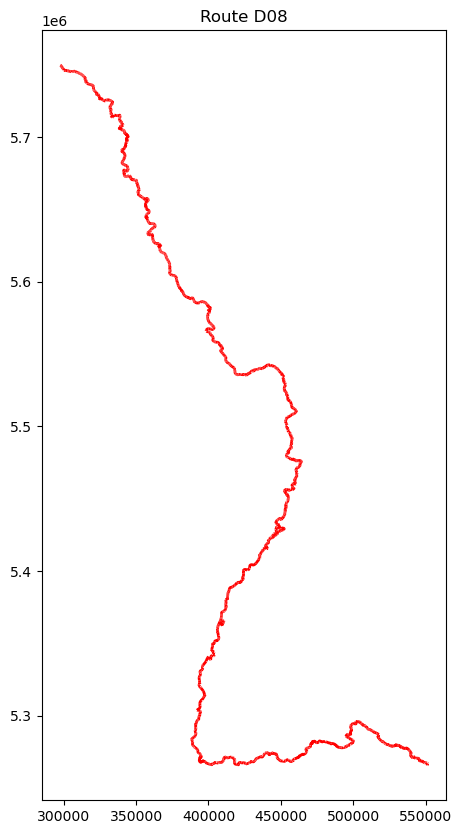

Länge der Route D08: 1060.39 Kilometer


In [8]:
# Selektiere die Route D08
selected_route = gdf[gdf['D08'] == 'D08']

# Datenvisualisierung der ausgewählten Route
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
# bundeslaender.plot(ax=ax, color='lightgrey', edgecolor='black')
selected_route.plot(ax=ax, color='red', linewidth=2)
plt.title('Route D08')
plt.show()

# Berechne die Länge der Route D08
length_km = selected_route.geometry.length.sum() / 1000

print(f"Länge der Route D08: {length_km:.2f} Kilometer")

In [9]:
# Speichere die Ausgabe in ein GeoJSON-File
output_geojson_path = 'route_d08.geojson'
selected_route.to_file(output_geojson_path, driver='GeoJSON')

# Optional: Zeige die ersten Zeilen des GeoJSON an
with open(output_geojson_path, 'r') as f:
    first_lines = [next(f) for _ in range(10)]
    print("".join(first_lines))

{
"type": "FeatureCollection",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:EPSG::25832" } },
"features": [
{ "type": "Feature", "properties": { "layer": "Radnetz_Deutschland", "FID": "0", "Routen-Nr": "D08", "Stand": "1.12.2021", "D01": null, "D02": null, "D03": null, "D04": null, "D05": null, "D06": null, "D07": null, "D08": "D08", "D09": null, "D10": null, "D11": null, "D12": null, "RDE": null }, "geometry": { "type": "LineString", "coordinates": [ [ 447965.029840470757335, 5430666.479664971120656, 0.0 ], [ 447979.39170913916314, 5430661.191097031347454, 0.0 ], [ 448010.344604903657455, 5430650.335754896514118, 0.0 ], [ 448074.239924668800086, 5430630.126485180109739, 0.0 ] ] } },
{ "type": "Feature", "properties": { "layer": "Radnetz_Deutschland", "FID": "0", "Routen-Nr": "D08", "Stand": "1.12.2021", "D01": null, "D02": null, "D03": null, "D04": null, "D05": null, "D06": null, "D07": null, "D08": "D08", "D09": null, "D10": null, "D11": null, "D12": null, "RDE":

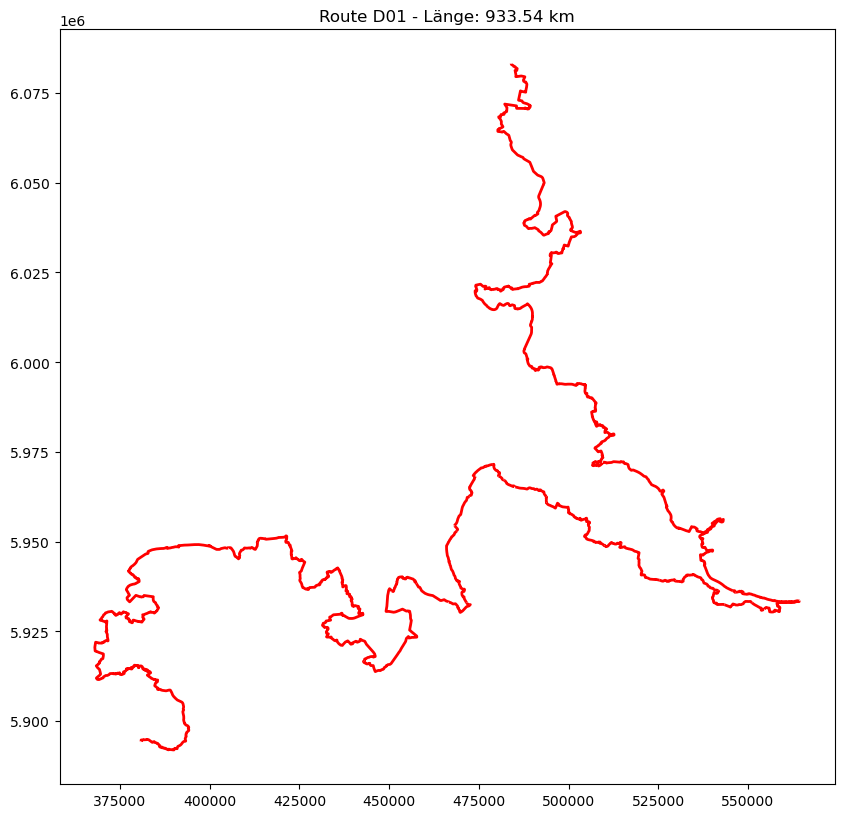

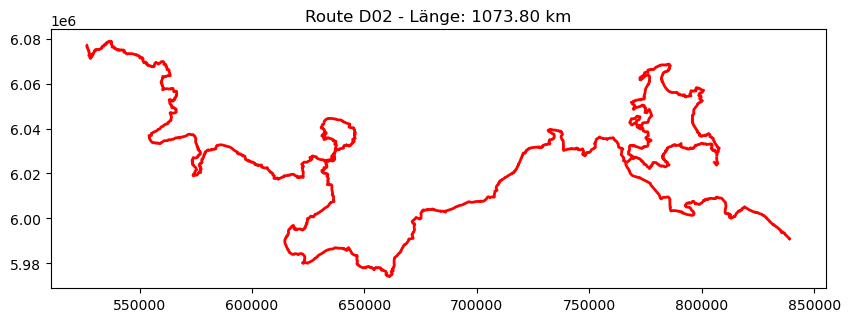

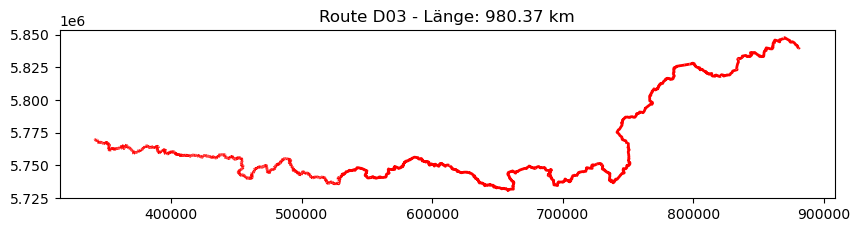

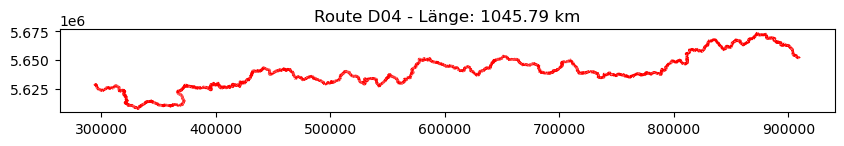

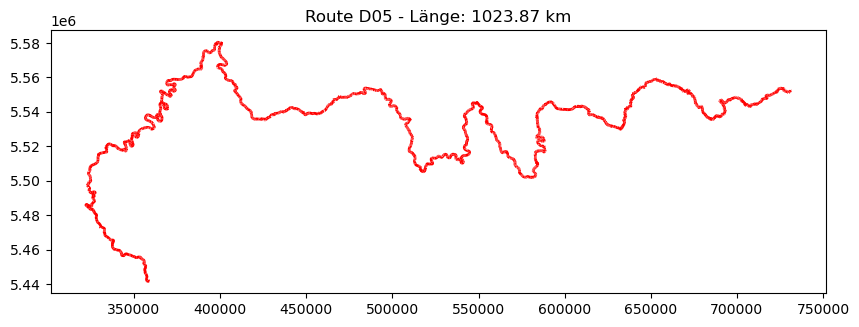

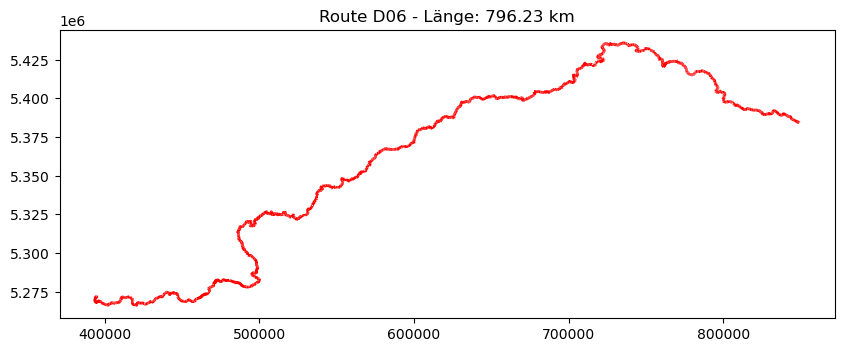

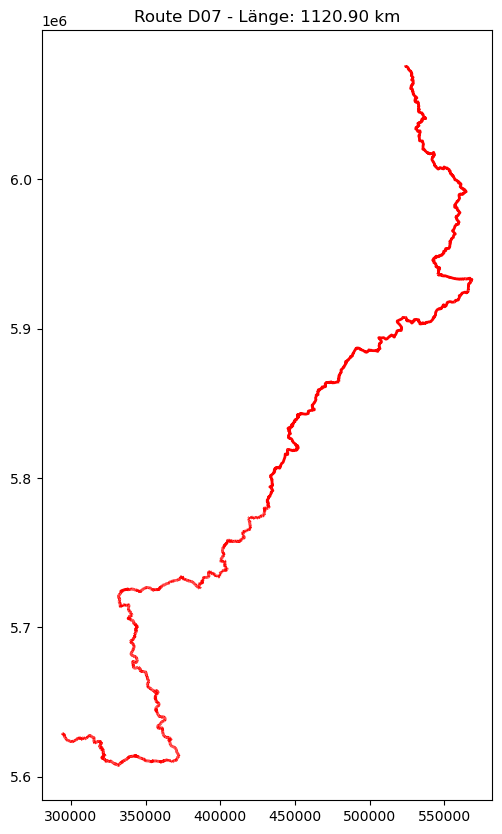

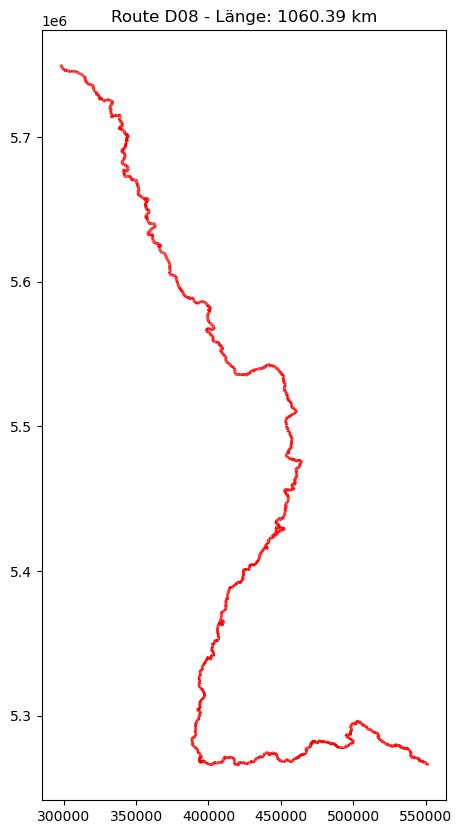

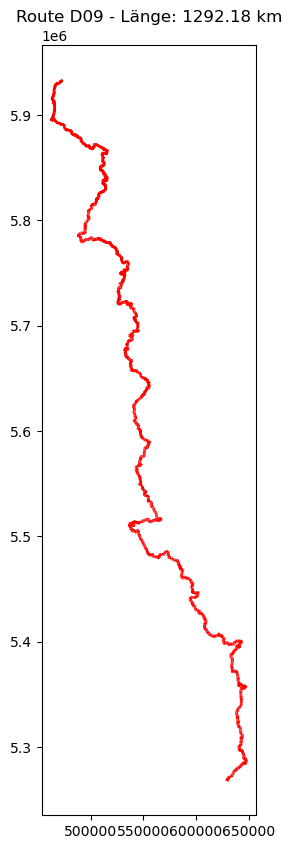

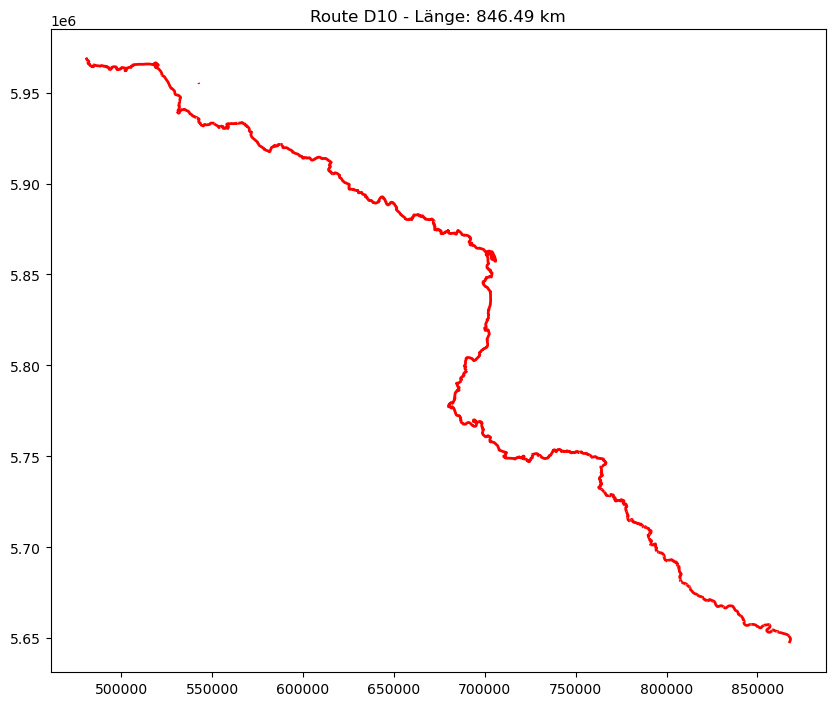

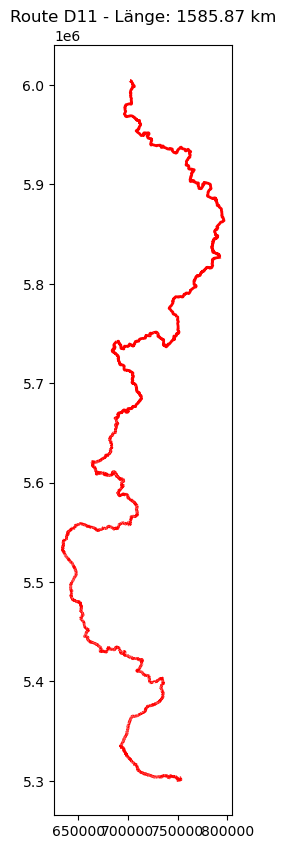

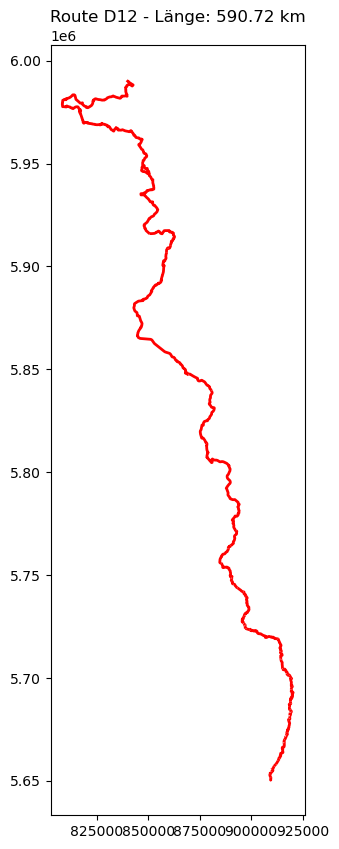

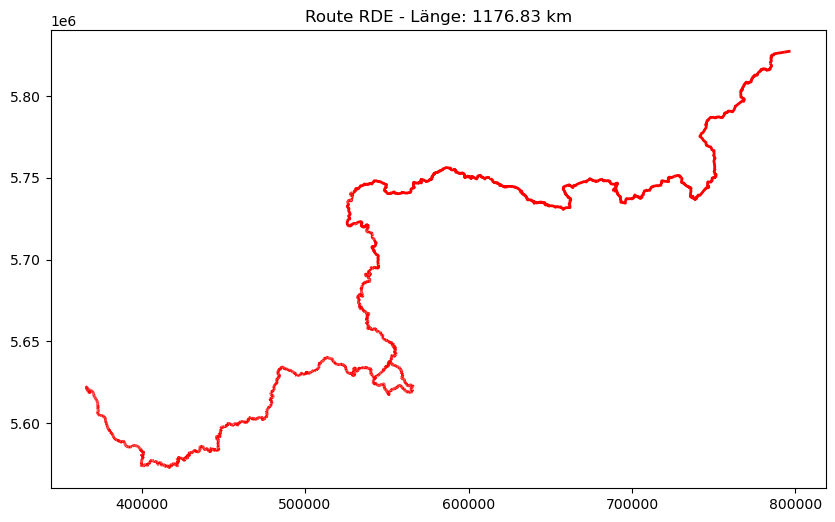

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: gdf ist Ihr GeoDataFrame für alle Routen

# Liste der Routen von D01 bis RDE
route_codes = ['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'RDE']

# Liste für die gespeicherten GeoDataFrames
saved_routes = []

for route_code in route_codes:
    # Selektion der aktuellen Route
    selected_route = gdf[gdf[route_code] == route_code]

    # Berechne die Länge der aktuellen Route
    length_km = selected_route.geometry.length.sum() / 1000

    # Füge die Länge als neue Spalte hinzu
    selected_route['Laenge'] = length_km

    # Speichere das GeoDataFrame in die Liste
    saved_routes.append(selected_route)

    # Datenvisualisierung der ausgewählten Route
    fig, ax = plt.subplots(figsize=(10, 10))
    selected_route.plot(ax=ax, color='red', linewidth=2)
    plt.title(f"Route {route_code} - Länge: {length_km:.2f} km")
    plt.show()

# Kombiniere die GeoDataFrames zu einem einzigen GeoDataFrame
combined_routes = gpd.GeoDataFrame(pd.concat(saved_routes, ignore_index=True), crs=gdf.crs)

# Transformiere die Koordinaten in EPSG:4326
combined_routes = combined_routes.to_crs(epsg=4326)

# Speichere das kombinierte GeoDataFrame als GeoJSON-Datei
combined_routes.to_file('combined_routes.geojson', driver='GeoJSON')



### 4. Routenanalyse

#### 4.1 Längenberechung

In [11]:
import geopandas as gpd

# Liste der Routen von D01 bis RDE
selected_routes = gdf.loc[:, 'D01':'RDE']

# Berechne und zeige die Länge jeder Route
for route_code in selected_routes.columns:
    selected_route = gdf[gdf[route_code] == route_code]
    length_km = selected_route.geometry.length.sum() / 1000
    print(f"Länge der Route {route_code}: {length_km:.2f} Kilometer")
    

Länge der Route D01: 933.54 Kilometer
Länge der Route D02: 1073.80 Kilometer
Länge der Route D03: 980.37 Kilometer
Länge der Route D04: 1045.79 Kilometer
Länge der Route D05: 1023.87 Kilometer
Länge der Route D06: 796.23 Kilometer
Länge der Route D07: 1120.90 Kilometer
Länge der Route D08: 1060.39 Kilometer
Länge der Route D09: 1292.18 Kilometer
Länge der Route D10: 846.49 Kilometer
Länge der Route D11: 1585.87 Kilometer
Länge der Route D12: 590.72 Kilometer
Länge der Route RDE: 1176.83 Kilometer


#### 4.2 Auswertung Codelisten

In [12]:
import requests
import pandas as pd

# URL der Codeliste
url = "https://registry.gdi-de.org/codelist/de.bund.balm.radnetz/D-Route/D-Route.de.json"

# Abrufen der Daten
response = requests.get(url)
data = response.json()

# Zugriff auf die benötigten Daten unter 'de.bund.balm.radnetz' -> 'containeditems'
contained_items = data['de.bund.balm.radnetz']['containeditems']

# Extraktion von 'id' und 'label' für jedes Element
items_list = [{
    'id': item['value']['id'],
    'label': item['value']['label']['text']
} for item in contained_items]

# Erstellen einer DataFrame
df = pd.DataFrame(items_list)

# Anzeigen der Tabelle
df


id  \
0   https://registry.gdi-de.org/codelist/de.bund.b...   
1   https://registry.gdi-de.org/codelist/de.bund.b...   
2   https://registry.gdi-de.org/codelist/de.bund.b...   
3   https://registry.gdi-de.org/codelist/de.bund.b...   
4   https://registry.gdi-de.org/codelist/de.bund.b...   
5   https://registry.gdi-de.org/codelist/de.bund.b...   
6   https://registry.gdi-de.org/codelist/de.bund.b...   
7   https://registry.gdi-de.org/codelist/de.bund.b...   
8   https://registry.gdi-de.org/codelist/de.bund.b...   
9   https://registry.gdi-de.org/codelist/de.bund.b...   
10  https://registry.gdi-de.org/codelist/de.bund.b...   
11  https://registry.gdi-de.org/codelist/de.bund.b...   
12  https://registry.gdi-de.org/codelist/de.bund.b...   
13  https://registry.gdi-de.org/codelist/de.bund.b...   

                             label  
0           D1 Nordseeküstenroute   
1            D2 Ostseeküstenroute   
2                  D3 Europaroute   
3             D4 Mittelland-Route   
4              D5 Saar-Mosel-Main   
5                   D6 Donauroute   
6                  D7 Pilgerroute   
7                  D8 Rhein-Route   
8   D9 Weser - Romantische Straße   
9                   D10 Elbradweg   
10        D11 Ostsee - Oberbayern   
11          D12 Oder-Neiße-Radweg   
12         Radweg Deutsche Einheit  
13              Iron-Curtain-Trail

#### 4.3 Wikidata Abfrage mit Sparql

In [13]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import time

# Liste der Labels aus der Datei
labels = [
    'D1 Nordseeküstenroute', 'D2 Ostseeküstenroute', 'D3 Europaroute',
    'D4 Mittelland-Route', 'D5 Saar-Mosel-Main', 'D6 Donauroute',
    'D7 Pilgerroute', 'D8 Rhein-Route', 'D9 Weser - Romantische Straße',
    'D10 Elbradweg', 'D11 Ostsee - Oberbayern', 'D12 Oder-Neiße-Radweg',
    'Radweg Deutsche Einheit', 'Iron-Curtain-Trail'
]  

# SPARQL-Endpoint von Wikidata
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
sparql.addCustomHttpHeader("User-Agent", "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36")

# Funktion zum Abfragen von Wikidata für ein gegebenes Label
def query_wikidata(label, retries=3, delay=5):
    cleaned_label = label.strip().rstrip('\xa0')
    query = f'''
    SELECT ?item ?itemLabel WHERE {{
      ?item rdfs:label "{cleaned_label}"@de.
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". }}
    }}
    LIMIT 1
    '''
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    
    for attempt in range(retries):
        try:
            results = sparql.query().convert()
            for result in results["results"]["bindings"]:
                return result["item"]["value"], result["itemLabel"]["value"]
        except Exception as e:
            print(f"Error for label '{label}', attempt {attempt+1}/{retries}: {e}")
            time.sleep(delay)
    return "Nicht gefunden", "Nicht gefunden"

# Listen für die Sammlung der Ergebnisse
labels_list = []
items_list = []
itemLabels_list = []

# Abfrage für jedes Label ausführen und Ergebnisse in Listen sammeln
for label in labels:
    item, itemLabel = query_wikidata(label)
    labels_list.append(label)
    items_list.append(item)
    itemLabels_list.append(itemLabel)
    time.sleep(5)  # Pause zwischen den Anfragen, um Überlastung zu vermeiden

# Erstellen des DataFrames aus den Listen
df_results = pd.DataFrame({
    'Label': labels_list,
    'Wikidata Item': items_list,
    'Wikidata Label': itemLabels_list
})

# Ergebnisse anzeigen
print(df_results)


                            Label                             Wikidata Item  \
0           D1 Nordseeküstenroute                            Nicht gefunden   
1            D2 Ostseeküstenroute                            Nicht gefunden   
2                  D3 Europaroute                            Nicht gefunden   
3             D4 Mittelland-Route                            Nicht gefunden   
4              D5 Saar-Mosel-Main                            Nicht gefunden   
5                   D6 Donauroute                            Nicht gefunden   
6                  D7 Pilgerroute                            Nicht gefunden   
7                  D8 Rhein-Route                            Nicht gefunden   
8   D9 Weser - Romantische Straße                            Nicht gefunden   
9                   D10 Elbradweg                            Nicht gefunden   
10        D11 Ostsee - Oberbayern                            Nicht gefunden   
11          D12 Oder-Neiße-Radweg                   

#### 4.4 Matching Wikidata Label

In [14]:
from SPARQLWrapper import SPARQLWrapper, JSON
from fuzzywuzzy import process

# SPARQL-Endpunkt von Wikidata
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

# Labels, für die wir Einträge in Wikidata finden möchten
labels = [
    'D1 Nordseeküstenroute', 'D2 Ostseeküstenroute', 'D3 Europaroute',
    'D4 Mittelland-Route', 'D5 Saar-Mosel-Main', 'D6 Donauroute',
    'D7 Pilgerroute', 'D8 Rhein-Route', 'D9 Weser - Romantische Straße',
    'D10 Elbradweg', 'D11 Ostsee - Oberbayern', 'D12 Oder-Neiße-Radweg',
    'Radweg Deutsche Einheit', 'Iron-Curtain-Trail'
]

# SPARQL-Abfrage, um Namen von Radwegen zu erhalten (hier vereinfacht)
sparql_query = """
SELECT ?route ?routeLabel WHERE {
  ?route wdt:P31/wdt:P279* wd:Q353027;  # Instanz von (oder Unterklasse von) Radfernweg
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],de". }
}
LIMIT 5000  # Begrenzung der Abfrage
"""

request_url = "https://query.wikidata.org/sparql"
response = requests.get(request_url, params={'query': sparql_query, 'format': 'json'})
data = response.json()

# Extrahieren der Radwegnamen aus der Abfrageantwort
wikidata_labels = [item['routeLabel']['value'] for item in data['results']['bindings']]

# Für jedes Label in der Liste den besten Match in den Wikidata-Labels finden
for label in labels:
    best_match, score = process.extractOne(label, wikidata_labels)
    print(f"Label: {label} - Bester Wikidata Match: {best_match} mit Score: {score}")


Label: D1 Nordseeküstenroute - Bester Wikidata Match: EuroVelo 12 - Nordseeküsten-Route mit Score: 81
Label: D2 Ostseeküstenroute - Bester Wikidata Match: Ostseeküstenroute mit Score: 95
Label: D3 Europaroute - Bester Wikidata Match: Europaroute (D3) mit Score: 95
Label: D4 Mittelland-Route - Bester Wikidata Match: Mittelland-Route mit Score: 95
Label: D5 Saar-Mosel-Main - Bester Wikidata Match: Main-Radweg mit Score: 86
Label: D6 Donauroute - Bester Wikidata Match: Grünroute mit Score: 68
Label: D7 Pilgerroute - Bester Wikidata Match: Pilgerroute (D7) mit Score: 95
Label: D8 Rhein-Route - Bester Wikidata Match: Rhein-Route mit Score: 95
Label: D9 Weser - Romantische Straße - Bester Wikidata Match: Elbe-Weser-Radweg mit Score: 86
Label: D10 Elbradweg - Bester Wikidata Match: Elberadweg mit Score: 78
Label: D11 Ostsee - Oberbayern - Bester Wikidata Match: Ostsee–Oberbayern (D11) mit Score: 95
Label: D12 Oder-Neiße-Radweg - Bester Wikidata Match: Oder-Neiße-Radweg mit Score: 95
Label: Ra

## 5. Kombination und Integration weiterer Daten

#### 5.1 Hinzufügen Verwaltungsgebiete (z.B. VG250)

In [15]:
import requests
import geopandas as gpd
import leafmap

# WFS-URL für die Verwaltungsgebiete
wfs_vg250 = 'https://sgx.geodatenzentrum.de/wfs_vg250?service=wfs&version=2.0.0&request=GetFeature&TYPENAMES=vg250_lan&outputformat=json&srsName=EPSG:4326'

# Daten abrufen
data_vg250 = requests.get(wfs_vg250).json()

# GeoDataFrame aus den GeoJSON-Daten erstellen
gdf = gpd.GeoDataFrame.from_features(data_vg250["features"])

# Koordinatensystem setzen
gdf.crs = "EPSG:4326"

# Leafmap-Karte erstellen
m = leafmap.Map(height="700px", width="600px", center=(51.1657, 10.4515), zoom=6)

# GeoDataFrame zu GeoJSON konvertieren und mit Style hinzufügen
m.add_gdf(gdf, layer_name="Verwaltungsgebiete DE", style={"color": "black", "weight": 2, "fillOpacity": 0, "dashArray": "5, 5"})

# Layer-Kontrollleiste hinzufügen und Karte anzeigen
m.add_layer_control()
m

Map(center=[51.1657, 10.4515], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

#### 5.2 Hinzufügen lokaler Daten (z.B. Hamburg)

In [16]:
import requests
import geopandas as gpd
import leafmap

# WFS-URLs
wfs_radfernwege = 'https://geodienste.hamburg.de/HH_WFS_Freizeitrouten?service=WFS&request=GetFeature&version=2.0.0&typeNames=de.hh.up%3Aradfernwege&typeName=de.hh.up%3Aradfernwege&outputFormat=application%2Fgeo%2Bjson&resultType=results&SRSNAME=EPSG%3A4326&count=37&bbox=9.731784%2C+53.394007%2C+10.321975%2C+53.565852%2C++EPSG%3A4326'
wfs_freizeitrouten = 'https://geodienste.hamburg.de/HH_WFS_Freizeitrouten?service=WFS&request=GetFeature&version=2.0.0&typeNames=de.hh.up%3Afreizeitrouten&typeName=de.hh.up%3Afreizeitrouten&outputFormat=application%2Fgeo%2Bjson&resultType=results&SRSNAME=EPSG%3A4326&count=156&bbox=9.731784%2C+53.394075%2C+10.321150%2C+53.739937%2C++EPSG%3A4326'

# Daten abrufen
data_radfernwege = requests.get(wfs_radfernwege).json()
data_freizeitrouten = requests.get(wfs_freizeitrouten).json()

# GeoDataFrames erstellen und CRS setzen
gdf_radfernwege = gpd.GeoDataFrame.from_features(data_radfernwege["features"])
gdf_radfernwege.crs = "EPSG:4326"

gdf_freizeitrouten = gpd.GeoDataFrame.from_features(data_freizeitrouten["features"])
gdf_freizeitrouten.crs = "EPSG:4326"

# Leafmap-Karte erstellen
m = leafmap.Map(height="700px", width="600px", center=(53.5511, 9.9937), zoom=10)  # Hamburg zentrieren

# GeoDataFrames mit unterschiedlichem Stil zur Karte hinzufügen
m.add_gdf(gdf_radfernwege, layer_name="Radfernwege HH", style={"color": "red", "weight": 2, "dashArray": "5, 5"})
m.add_gdf(gdf_freizeitrouten, layer_name="Freizeitrouten HH", style={"color": "green", "weight": 2})

# Layer-Kontrolle hinzufügen und Karte anzeigen
m.add_layer_control()
m


Map(center=[53.5511, 9.9937], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

#### 5.3 Datenvisualisierung

In [17]:
# Leafmap-Karte mit Radnetz Deutschland erstellen
m = leafmap.Map(height="700px", width="600px", center=(51.1657, 10.4515), zoom=6)
in_shp = 'https://www.radroutenplaner-deutschland.de/downloads/Shape/Radnetz_Deutschland_Shape.zip'
m.add_shp(in_shp, layer_name="Radnetz DE", style={"color": "blue", "weight": 2})

# Weitere Datensätze mit einer unterschiedlichen Farbe hinzufügen
m.add_geojson(data_vg250, layer_name="Verwaltungsgebiete DE", style={"color": "black", "weight": 2, "fillOpacity": 0, "dashArray": "5, 5"})
m.add_geojson(data_freizeitrouten, layer_name="Freizeitrouten HH", style={"color": "green", "weight": 2})
m.add_geojson(data_radfernwege, layer_name="Radfernwege HH", style={"color": "red", "weight": 2, "dashArray": "5, 5"})

# Karte mit Layer-Controll anzeigen
m.add_layer_control()
m

Map(center=[51.1657, 10.4515], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…